# Gaussian Mixture Model

In [164]:
import itertools

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.mixture import GaussianMixture



## Cluster #1

In [147]:
# generamos un conjunto de datos con una varianza determianda

n_samples = 500

# Generate random sample
np.random.seed(0)

# Con esta función vamos a generar dos variables (x e y), entre sí van a ser independientes
# y cada una de las cuales tendrá distribución normal
# esto va a terminar generando un dataset sintético que tendrán una forma esférica. La varianza en cada una de las dimensiones
# va a ser igual

X1 = np.random.randn(n_samples,
                     2 # numero de variables (features) que vamos a generar
                     ) 

type(X1)

numpy.ndarray

In [148]:
X1[:5] 

array([[ 1.76405235,  0.40015721],
       [ 0.97873798,  2.2408932 ],
       [ 1.86755799, -0.97727788],
       [ 0.95008842, -0.15135721],
       [-0.10321885,  0.4105985 ]])

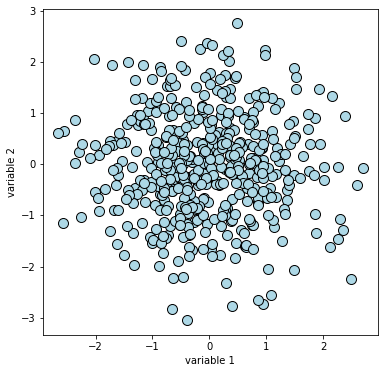

In [149]:
# graficamos los datos generados
plt.figure(figsize=(6,6))
plt.plot(X1[: , 0],X1[: , 1],
         'o',
         markerfacecolor='lightBlue',
         markeredgecolor='k', markersize=10)
plt.xlabel('variable 1')
plt.ylabel('variable 2')
plt.show()

## Cluster #2

In [150]:
# vamos a generar un segundo grupo de datos que va a tener una distribución diferente al que generamos antes

n_samples = 500

# Generate random sample, two components
np.random.seed(0)
C = np.array([[0., -0.1], [1.7, .4]]) # para "deformar" y obtener un cluster que no sea circular.
X2 = np.r_[np.dot(np.random.randn(n_samples, 2), C)]

In [151]:
X2[:10]

array([[ 0.68026725, -0.01634235],
       [ 3.80951844,  0.79848348],
       [-1.6613724 , -0.57766695],
       [-0.25730725, -0.15555173],
       [ 0.69801745,  0.17456129],
       [ 2.47226496,  0.56730505],
       [ 0.20684753, -0.02743377],
       [ 0.56724636,  0.08908341],
       [-0.34876905, -0.23147121],
       [-1.45196276, -0.37294507]])

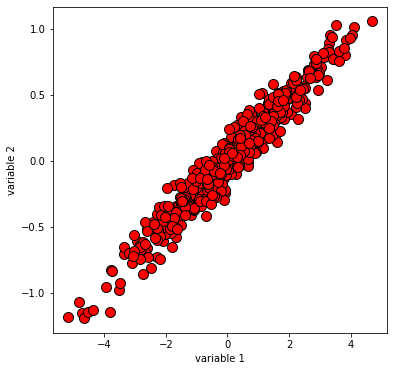

In [152]:
# graficamos los datos generados
plt.figure(figsize=(6,6))
plt.plot(X2[: , 0],X2[: , 1],
         'o',
         markerfacecolor='red',
         markeredgecolor='k', markersize=10)
plt.xlabel('variable 1')
plt.ylabel('variable 2')
plt.show()

## Unimos los dos clusters de datos

In [153]:
# vamos a generar un segundo grupo de datos que va a tener una distribución diferente al que generamos antes
# Generate random sample, two components

X = np.r_[X2,
          .7 * X1 
          + np.array([-6, 3]) # esta linea mueve el cluster para que no queden los dos centrados en la misma posición.
          ] 


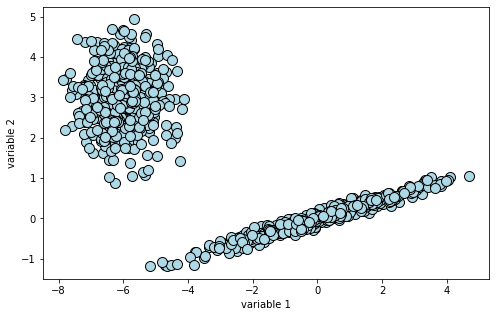

In [154]:
plt.figure(figsize=(8,5))
plt.plot(X[: , 0],X[: , 1],
            'o',
            markerfacecolor='lightBlue',
            markeredgecolor='k', markersize=10
            )
plt.xlabel('variable 1')
plt.ylabel('variable 2')
plt.show()

### `n_components` = 5

In [155]:
gmm5 = GaussianMixture(n_components=5,
                       covariance_type='full',
                       random_state=0,
                       verbose = 1
                       )
gmm5.fit(X) 


Initialization 0
Initialization converged: True


GaussianMixture(n_components=5, random_state=0, verbose=1)

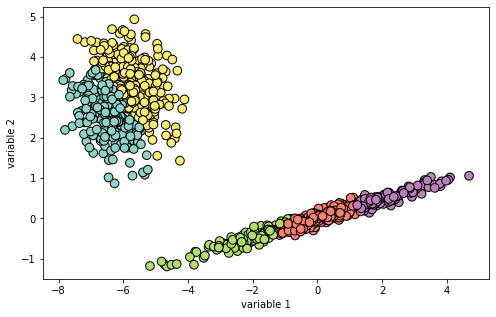

In [156]:
gmm5_labels = gmm5.predict(X)
plt.figure(figsize=(8,5))
plt.scatter(X[: , 0],X[: , 1],
            edgecolors = 'k',
            s=75,
            c = gmm5_labels,
            cmap='Set3'
            )
plt.xlabel('variable 1')
plt.ylabel('variable 2')
plt.show()



### `n_components` = 2

In [157]:
gmm2 = GaussianMixture(n_components=2,
                       covariance_type='full',
                       random_state=0,
                       verbose = 1
                       )
gmm2.fit(X) 


Initialization 0
Initialization converged: True


GaussianMixture(n_components=2, random_state=0, verbose=1)

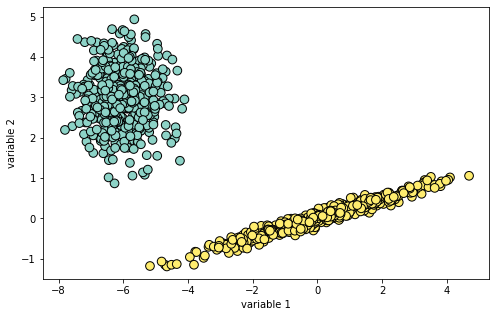

In [158]:
gmm2_labels = gmm2.predict(X)
plt.figure(figsize=(8,5))
plt.scatter(X[: , 0],X[: , 1],
            edgecolors = 'k',
            s=75,
            c = gmm2_labels,
            cmap='Set3'
            )
plt.xlabel('variable 1')
plt.ylabel('variable 2')
plt.show()



### `n_components` = 3

In [159]:
gmm3 = GaussianMixture(n_components=3,
                       covariance_type='full',
                       random_state=0,
                    #    verbose = 1
                       )
gmm3.fit(X) 


GaussianMixture(n_components=3, random_state=0)

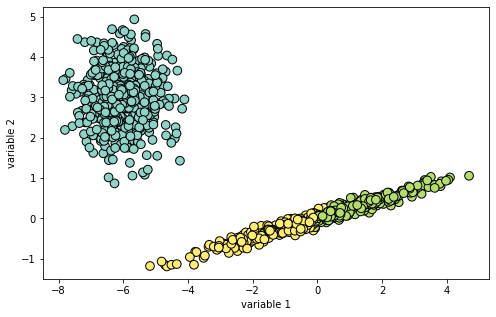

In [160]:
gmm3_labels = gmm3.predict(X)
plt.figure(figsize=(8,5))
plt.scatter(X[: , 0],X[: , 1],
            edgecolors = 'k',
            s=75,
            c = gmm3_labels,
            cmap='Set3'
            )
plt.xlabel('variable 1')
plt.ylabel('variable 2')
plt.show()



### `n_components` = 10

In [161]:
gmm10 = GaussianMixture(n_components=10,
                       covariance_type='full',
                       random_state=0,
                    #    verbose = 1
                       )
gmm10.fit(X) 


GaussianMixture(n_components=10, random_state=0)

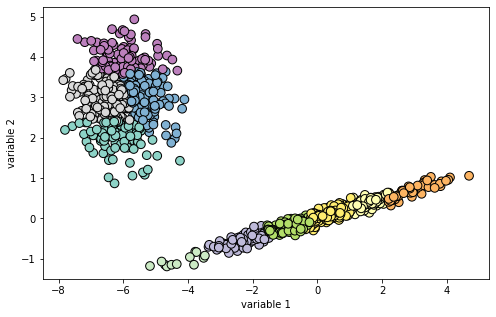

In [162]:
gmm10_labels = gmm10.predict(X)
plt.figure(figsize=(8,5))
plt.scatter(X[: , 0],X[: , 1],
            edgecolors = 'k',
            s=75,
            c = gmm10_labels,
            cmap='Set3'
            )
plt.xlabel('variable 1')
plt.ylabel('variable 2')
plt.show()

